# SemEval Exploratory Data Analysis
This notebook contains the exploratory data analysis of the SemEval 2017 task 4-A training and testing datasets.

In [3]:
import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

[nltk_data] Downloading package stopwords to /home/rafael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rafael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Dataset Loading

In [4]:
semeval_train_path = '/home/rafael/Datasets/semeval/data/clean/train.tsv'
semeval_test_path = '/home/rafael/Datasets/semeval/data/clean/test2017.tsv'

In [5]:
# Loading dataframes
train_df = pd.read_csv(semeval_train_path, 
                          sep="\t",
                          header=None, 
                          names=['target', 'text'],
                          quotechar='"'
                         # encoding='utf-8'
                         )

test_df = pd.read_csv(semeval_test_path, 
                          sep="\t",
                          header=None, 
                          names=['target', 'text'],
                          quotechar='"'
                         # encoding='utf-8'
                         )

# Transforming int labels into strings
train_df['target'] = train_df['target'].map({'positive': 2, 'negative': 0, 'neutral':1})
test_df['target'] = test_df['target'].map({'positive': 2, 'negative': 0, 'neutral':1})

In [6]:
n_train = train_df.shape[0]
print(f"Size of train dataset:{n_train}")

n_test = test_df.shape[0]
print(f"Size of train dataset:{n_test}")

Size of train dataset:50333
Size of train dataset:12284


## Label distribution for the Training Dataset

In [30]:
train_dist = dict()
train_dist['labels'] = ['negative','neutral','positive']
train_dist['count'] = []
train_dist['count'].append(train_df[train_df['target'] == 0].shape[0] / train_df.shape[0])
train_dist['count'].append(train_df[train_df['target'] == 1].shape[0] / train_df.shape[0])
train_dist['count'].append(train_df[train_df['target'] == 2].shape[0] / train_df.shape[0])

In [31]:
train_dist

{'labels': ['negative', 'neutral', 'positive'],
 'count': [0.15576262094450957, 0.44883078695885403, 0.3954065920966364]}

<AxesSubplot:title={'center':'Percentage of Tweets per sentiment category in SemEval Training dataset'}, xlabel='Sentiment category', ylabel='Percentage'>

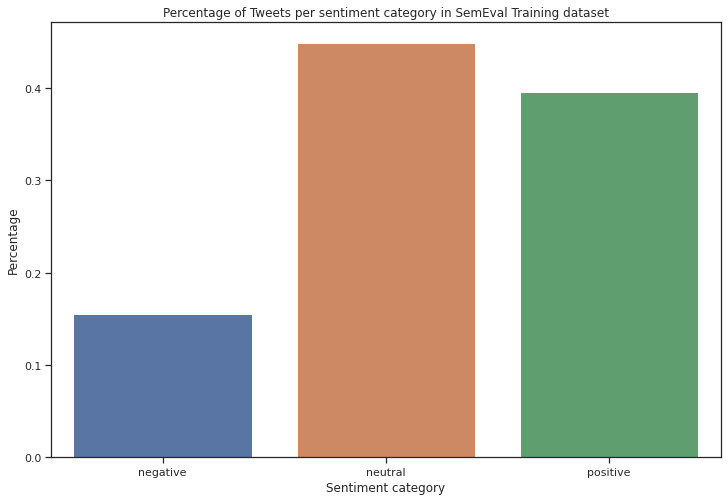

In [37]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Tweets per sentiment category in SemEval Training dataset')
plt.xlabel('Sentiment category')
plt.ylabel('Percentage')
sns.barplot(x=train_dist['labels'], y=train_dist['count'])

## Label distribution for the Testing Dataset

In [33]:
test_dist = dict()
test_dist['labels'] = ['negative','neutral','positive']
test_dist['count'] = []
test_dist['count'].append(test_df[test_df['target'] == 0].shape[0] / test_df.shape[0])
test_dist['count'].append(test_df[test_df['target'] == 1].shape[0] / test_df.shape[0])
test_dist['count'].append(test_df[test_df['target'] == 2].shape[0] / test_df.shape[0])

<AxesSubplot:title={'center':'Percentage of Tweets per sentiment category in SemEval testing dataset'}, xlabel='Sentiment category', ylabel='Percentage'>

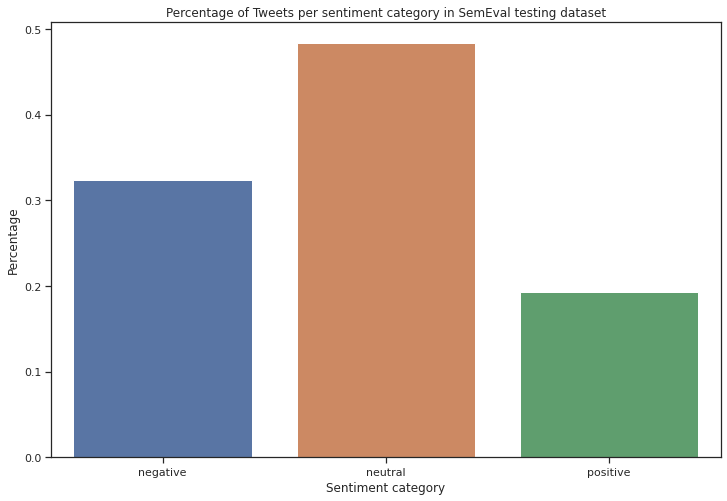

In [36]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Tweets per sentiment category in SemEval testing dataset')
plt.xlabel('Sentiment category')
plt.ylabel('Percentage')
sns.barplot(x=test_dist['labels'], y=test_dist['count'])

## Token Statistics

### Max, min and mean number of words per Tweet

In [9]:
from statistics import mean

def tokens_stats(tokenized_list):
    size_list = []
    for tokens in tokenized_list:
        size_list.append(len(tokens))
    return max(size_list), min(size_list), mean(size_list)


def tokenize_text(text):
    terms = []
    for sentence in text:
        terms.append(word_tokenize(sentence))
    return terms

def remove_stopwords_punctuation(text):
    terms = []
    for tokens in text:
        #remove stopwords
        filtered_sentence = [w for w in tokens if not w.lower() in stop_words]
        #remove punctuation
        filtered_sentence = [word for word in filtered_sentence if word.isalnum()]
        terms.append(filtered_sentence)
    return terms

def count_frequency(terms_list):
    frequency = dict()
    for terms in terms_list:
        terms_lower = [term.lower() for term in terms]
        for term in terms_lower:
            if term in frequency:
                frequency[term] += 1
            else:
                frequency[term] = 1
    return dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True)[1:21])


In [10]:
train_tweets = train_df['text']
test_tweets = test_df['text']

In [11]:
#Tokenizing tweets and lower
train_text_tokenized = tokenize_text(train_tweets)
test_text_tokenized = tokenize_text(test_tweets)

In [12]:
# counting max tokens in sentence
print(f"Tokens stats for training dataset: \n\
      -> max:{tokens_stats(train_text_tokenized)[0]} \n\
      -> min:{tokens_stats(train_text_tokenized)[1]} \n\
      -> mean:{tokens_stats(train_text_tokenized)[2]} \n ")

print(f"Tokens stats for test dataset: \n\
        -> max:{tokens_stats(test_text_tokenized)[0]} \n\
        -> min:{tokens_stats(test_text_tokenized)[1]} \n\
        -> mean:{tokens_stats(test_text_tokenized)[2]} \n ")

Tokens stats for training dataset: 
      -> max:110 
      -> min:1 
      -> mean:22.566924284266783 
 
Tokens stats for test dataset: 
        -> max:42 
        -> min:1 
        -> mean:17.951155975252362 
 


### Top 20 most frequent words per Dataset

In [13]:
#removing stopwords and punctuation
train_no_swp = remove_stopwords_punctuation(train_text_tokenized)
test_no_swp = remove_stopwords_punctuation(test_text_tokenized)

In [14]:
# counting word frequency
train_top_20_terms = count_frequency(train_no_swp)
test_top_20_terms = count_frequency(test_no_swp)

#### Top 20 most frequent terms in the Training dataset

<AxesSubplot:title={'center':'Term frequency SemEval 2017 Task4-A Training Dataset'}, xlabel='Frequency'>

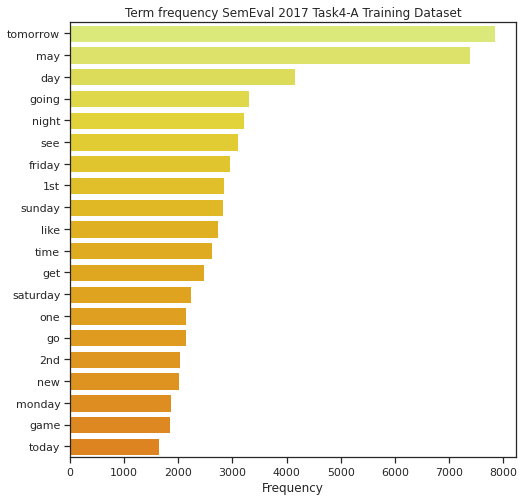

In [15]:
data_on_train = {
    'terms': list(train_top_20_terms.keys()),
    'frequency':list(train_top_20_terms.values())
}
plt.figure(figsize=(8,8))
plt.title('Term frequency SemEval 2017 Task4-A Training Dataset')
plt.xlabel('Frequency')
sns.barplot(x='frequency',y='terms', data=data_on_train, palette="Wistia")

#### Top 20 most frequent terms in the testing dataset

<AxesSubplot:title={'center':'Term frequency SemEval 2017 Task4-A Testing Dataset'}, xlabel='Frequency'>

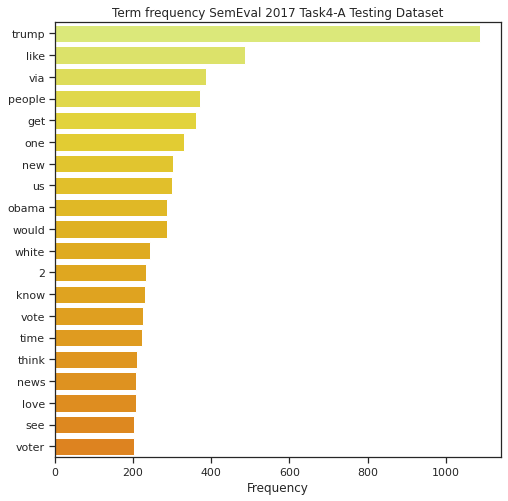

In [16]:
data_on_test = {
    'terms': list(test_top_20_terms.keys()),
    'frequency':list(test_top_20_terms.values())
}
plt.figure(figsize=(8,8))
plt.title('Term frequency SemEval 2017 Task4-A Testing Dataset')
plt.xlabel('Frequency')
sns.barplot(x='frequency',y='terms', data=data_on_test, palette="Wistia")

## Word frequency in datasets per label

### Training dataset

#### Negative

In [17]:
negative_tweets = train_df[train_df['target'] == 0]
negative_tweets_text = negative_tweets['text']

negative_text_tokenized = tokenize_text(negative_tweets_text)
negative_text_no_swp = remove_stopwords_punctuation(negative_text_tokenized)
negative_term_frequency = count_frequency(negative_text_no_swp)

#### neutral

In [18]:
neutral_tweets = train_df[train_df['target'] == 1]
neutral_tweets_text = neutral_tweets['text']

neutral_text_tokenized = tokenize_text(neutral_tweets_text)
neutral_text_no_swp = remove_stopwords_punctuation(neutral_text_tokenized)
neutral_term_frequency = count_frequency(neutral_text_no_swp)

#### positive

In [20]:
positive_tweets = train_df[train_df['target'] == 2]
positive_tweets_text = positive_tweets['text']

positive_text_tokenized = tokenize_text(positive_tweets_text)
positive_text_no_swp = remove_stopwords_punctuation(positive_text_tokenized)
positive_term_frequency = count_frequency(positive_text_no_swp)

In [21]:
data = {
    'term':list(negative_term_frequency.keys()),
    'frequency':list(negative_term_frequency.values())
}
negative_df = pd.DataFrame.from_dict(data)
negative_df['label'] = ['negative']*20

data = {
    'term':list(neutral_term_frequency.keys()),
    'frequency':list(neutral_term_frequency.values())
}
neutral_df = pd.DataFrame.from_dict(data)
neutral_df['label'] = ['neutral']*20

data = {
    'term':list(positive_term_frequency.keys()),
    'frequency':list(positive_term_frequency.values())
}
positive_df = pd.DataFrame.from_dict(data)
positive_df['label'] = ['positive']*20

frames = [negative_df, neutral_df, positive_df]

train_term_frequency_data = pd.concat(frames)

Text(0, 0.5, '')

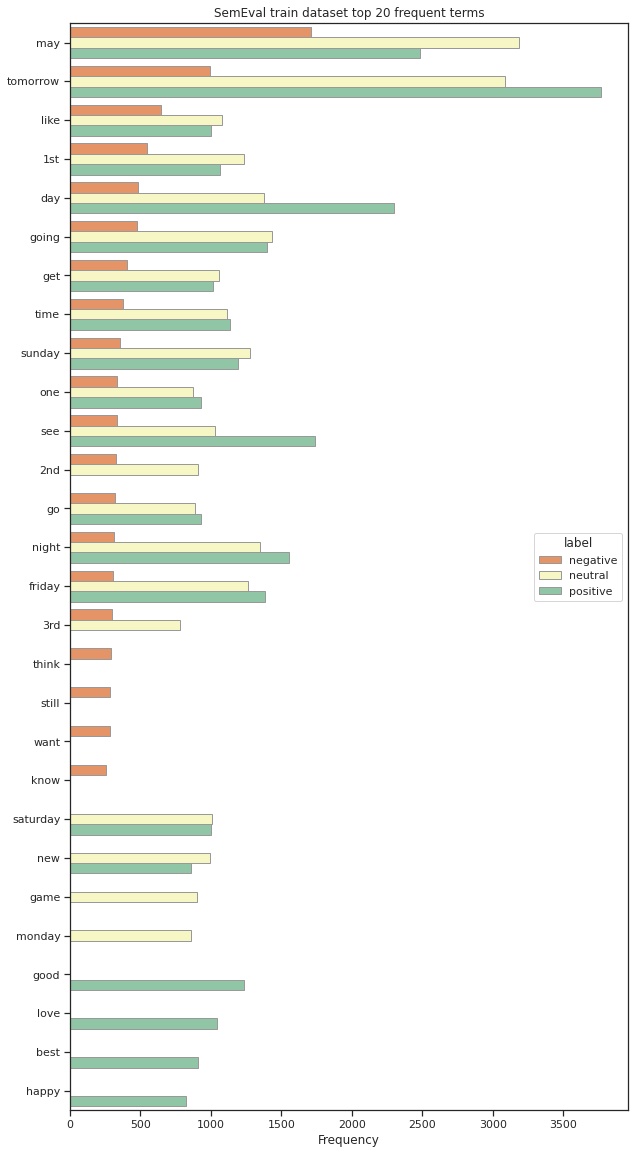

In [38]:
f = plt.figure(figsize=(10, 20))

plt.title('SemEval train dataset top 20 frequent terms')
sns.barplot(x="frequency" ,y="term", hue="label",
            palette="Spectral", edgecolor=".6",
            data=train_term_frequency_data)
plt.xlabel('Frequency')
plt.ylabel('')

### Testing dataset

#### Negative

In [24]:
negative_tweets_test = test_df[test_df['target'] == 0]
negative_tweets_text_test = negative_tweets_test['text']

negative_term_frequency_test = count_frequency(remove_stopwords_punctuation(tokenize_text(negative_tweets_text_test)))

#### Neutral

In [25]:
neutral_tweets_test = test_df[test_df['target'] == 1]
neutral_tweets_text_test = neutral_tweets_test['text']

neutral_term_frequency_test = count_frequency(remove_stopwords_punctuation(tokenize_text(neutral_tweets_text_test)))

#### positive

In [26]:
positive_tweets_test = test_df[test_df['target'] == 2]
positive_tweets_text = positive_tweets_test['text']

positive_term_frequency_test = count_frequency(remove_stopwords_punctuation(tokenize_text(positive_tweets_text)))

In [27]:
data = {
    'term':list(negative_term_frequency_test.keys()),
    'frequency':list(negative_term_frequency_test.values())
}
negative_df_test = pd.DataFrame.from_dict(data)
negative_df_test['label'] = ['negative']*20

data = {
    'term':list(neutral_term_frequency_test.keys()),
    'frequency':list(neutral_term_frequency_test.values())
}
neutral_df_test = pd.DataFrame.from_dict(data)
neutral_df_test['label'] = ['neutral']*20

data = {
    'term':list(positive_term_frequency_test.keys()),
    'frequency':list(positive_term_frequency_test.values())
}
positive_df_test = pd.DataFrame.from_dict(data)
positive_df_test['label'] = ['positive']*20

frames = [negative_df_test, neutral_df_test, positive_df_test]

train_term_frequency_data_test = pd.concat(frames)

Text(0, 0.5, '')

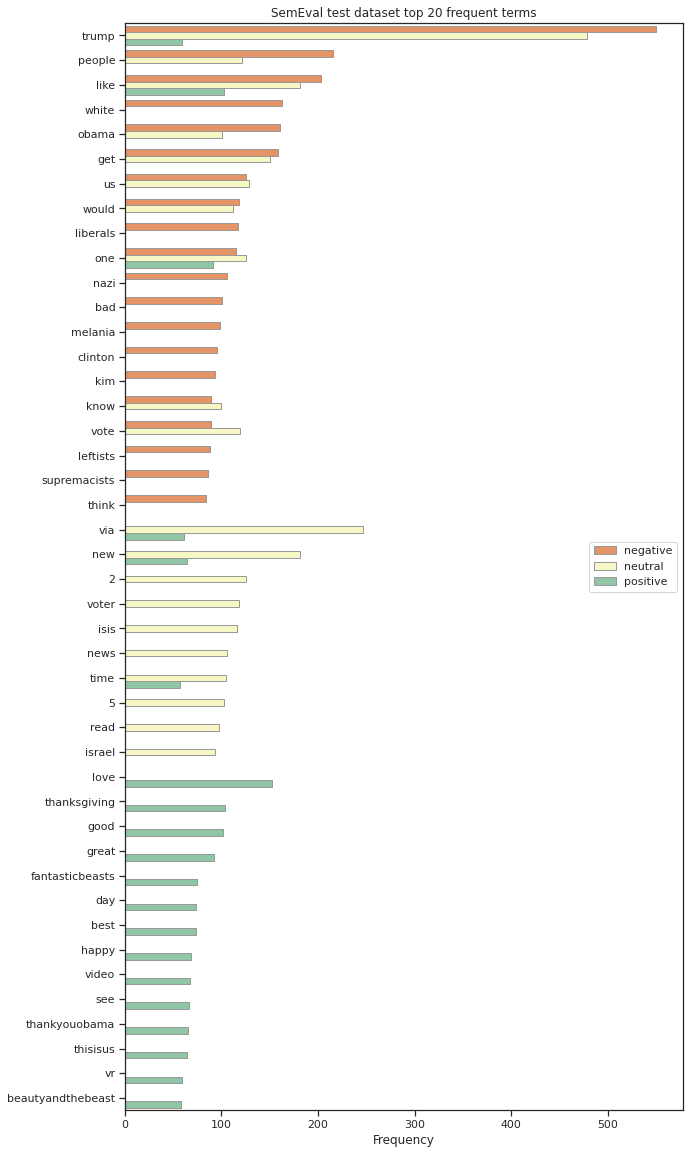

In [41]:
ax = plt.figure(figsize=(10, 20))

plt.title('SemEval test dataset top 20 frequent terms')
sns.barplot(x="frequency" ,y="term", hue="label",
            palette="Spectral", edgecolor=".6",
            data=train_term_frequency_data_test)
plt.xlabel('Frequency')
plt.legend(loc='center right')
plt.ylabel('')